# 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
path = '../input/child-mind-institute-problematic-internet-use/'

# Load the training data
train = pd.read_csv(path+'train.csv')
train.head(5)

#don's consider physical data like Physical Measures, FitnessGram Vitals and Treadmill, FitnessGram Child, Bio-electric Impedance Analysis, 

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
print(f"Train shape: {train.shape}")

Train shape: (3960, 82)


In [3]:
# Load the data dictionary data
data_dictionary = pd.read_csv(path+'data_dictionary.csv')
data_dictionary.head(5)


,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


In [4]:
# Load the test data
test = pd.read_csv(path+'test.csv')
test.head(5)

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Some features that are related to the target variable and are not present in the test set. They can act as labels too, either predict them or either predict the output directly

In [5]:
train_cols = set(train.columns)
test_cols = set(test.columns)
columns_not_in_test = sorted(list(train_cols - test_cols))
data_dictionary[data_dictionary['Field'].isin(columns_not_in_test)]

,Instrument,Field,Description,Type,Values,Value Labels
54,Parent-Child Internet Addiction Test,PCIAT-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
55,Parent-Child Internet Addiction Test,PCIAT-PCIAT_01,How often does your child disobey time limits ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
56,Parent-Child Internet Addiction Test,PCIAT-PCIAT_02,How often does your child neglect household ch...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
57,Parent-Child Internet Addiction Test,PCIAT-PCIAT_03,How often does your child prefer to spend time...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
58,Parent-Child Internet Addiction Test,PCIAT-PCIAT_04,How often does your child form new relationshi...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
59,Parent-Child Internet Addiction Test,PCIAT-PCIAT_05,How often do you complain about the amount of ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
60,Parent-Child Internet Addiction Test,PCIAT-PCIAT_06,How often do your child's grades suffer becaus...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
61,Parent-Child Internet Addiction Test,PCIAT-PCIAT_07,How often does your child check his or her e-m...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
62,Parent-Child Internet Addiction Test,PCIAT-PCIAT_08,How often does your child seem withdrawn from ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
63,Parent-Child Internet Addiction Test,PCIAT-PCIAT_09,How often does your child become defensive or ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."


The test dataset doesn't have any PCIAT columns (which is obvious too, since they are used to directly calculate the PII).

Insight:

We should focus on predicting the target from all other features except the PCIAT results.
We know the target only for two thirds of the samples. The samples without target can perhaps be used for semi-supervised learning.
We can directly predict sii (this is the value we have to submit), or we can predict PCIAT-PCIAT_Total and then transform this prediction to a sii prediction for submission. As PCIAT-PCIAT_Total is more granular and informative than sii, training to predict PCIAT-PCIAT_Total has the potential to produce a better model.

Some SII is calculated even when some of PCIAT score is null, this will cause data inconsistency, so let's remove that

In [6]:
train['sii'].unique()

array([ 2.,  0.,  1., nan,  3.])

Number of rows with NaN in PCIAT-PCIAT_Total: 1289


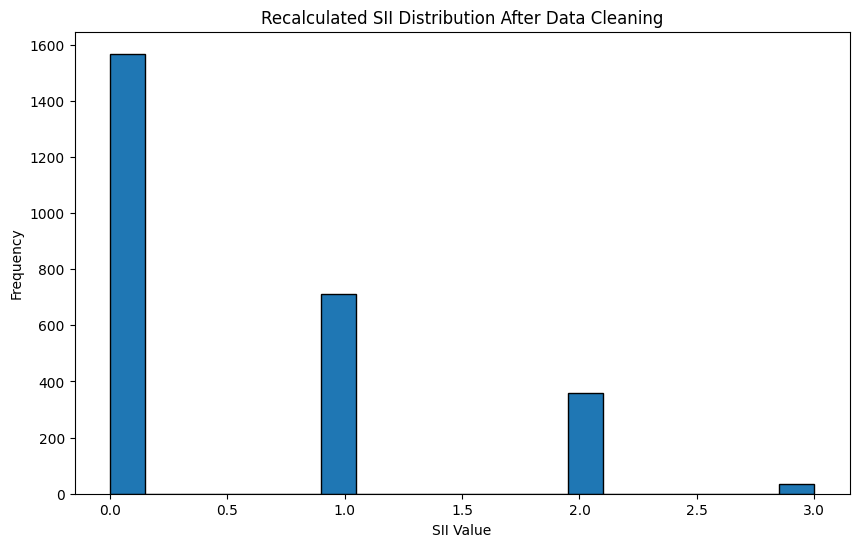

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,recalc_sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0,2
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0,0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0,0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0,1
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0,1


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming train is your DataFrame containing the relevant data

# Step 1: Automatically generate the list of pciat column names (20 columns)
PCIAT_cols = [f'PCIAT-PCIAT_{i+1:02d}' for i in range(20)]  # PCIAT-PCIAT_01 to PCIAT-PCIAT_20

# Step 2: Define the recalculate_sii function
def recalculate_sii(row):
    if pd.isna(row['PCIAT-PCIAT_Total']):
        return np.nan
    max_possible = row['PCIAT-PCIAT_Total'] + row[PCIAT_cols].isna().sum() * 5
    if row['PCIAT-PCIAT_Total'] <= 30 and max_possible <= 30:
        return 0
    elif 31 <= row['PCIAT-PCIAT_Total'] <= 49 and max_possible <= 49:
        return 1
    elif 50 <= row['PCIAT-PCIAT_Total'] <= 79 and max_possible <= 79:
        return 2
    elif row['PCIAT-PCIAT_Total'] >= 80 and max_possible >= 80:
        return 3
    return np.nan

# Step 3: Calculate pciat_total, mark as NaN if any pciat value is NaN
train['PCIAT-PCIAT_Total'] = train[PCIAT_cols].apply(
    lambda x: x.sum() if x.notna().all() else np.nan, axis=1
)

# Step 4: Count rows with PCIAT-PCIAT_Total as NaN
nan_count = train['PCIAT-PCIAT_Total'].isna().sum()
print(f"Number of rows with NaN in PCIAT-PCIAT_Total: {nan_count}")

# Step 5: Drop rows where PCIAT-PCIAT_Total is NaN
train = train.dropna(subset=['PCIAT-PCIAT_Total'])

# Step 6: Recalculate SII using the recalculate_sii function on the cleaned data
train['recalc_sii'] = train.apply(recalculate_sii, axis=1)

# Step 7: Visualize the SII distribution
plt.figure(figsize=(10, 6))
plt.hist(train['recalc_sii'], bins=20, edgecolor='black')
plt.title('Recalculated SII Distribution After Data Cleaning')
plt.xlabel('SII Value')
plt.ylabel('Frequency')
plt.show()

# Show the first few rows of the cleaned data with recalc_sii
train.head()


In [8]:
train['recalc_sii'].unique()

array([2, 0, 1, 3])

only use the corrected SII. I will only use total scores if all PCIAT_cols have non-NA values (all questions of the Parent-Child Internet Addiction Test have been answered).

In [9]:
train['sii'] = train['recalc_sii']

train.drop(columns='recalc_sii', inplace=True)
train.head()


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1


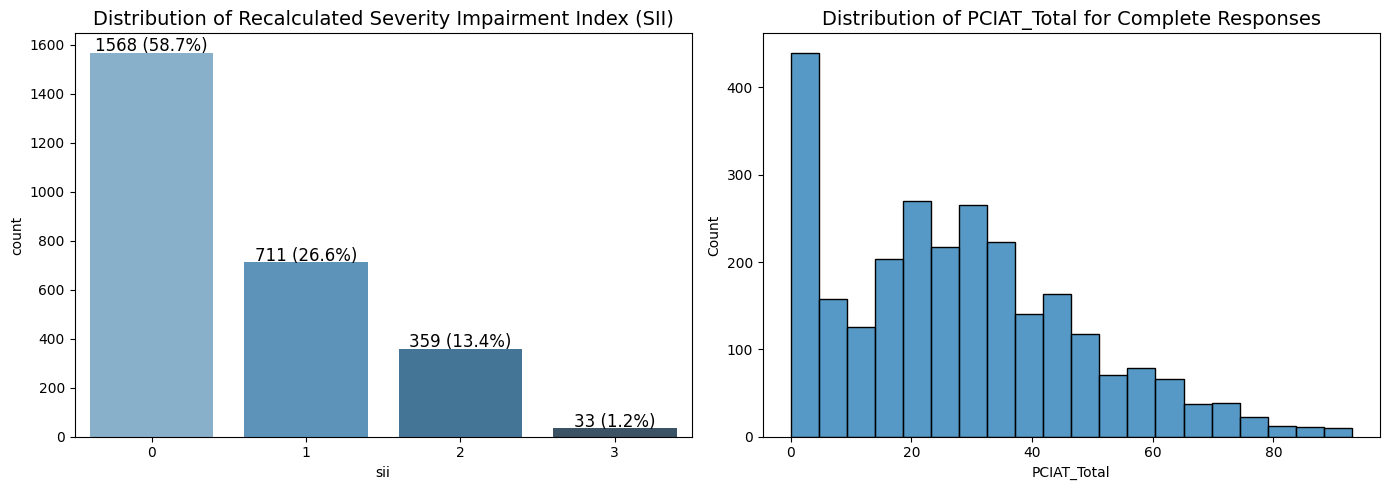

In [10]:
import seaborn as sns

# Step 1: Calculate SII counts and percentages
sii_counts = train['sii'].value_counts().reset_index()
sii_counts.columns = ['sii', 'count']  # Renaming columns for clarity
total = sii_counts['count'].sum()
sii_counts['percentage'] = (sii_counts['count'] / total) * 100

# Step 2: Create the subplots for visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# SII Distribution
sns.barplot(x='sii', y='count', data=sii_counts, palette='Blues_d', ax=axes[0])
axes[0].set_title('Distribution of Recalculated Severity Impairment Index (SII)', fontsize=14)
for p in axes[0].patches:
    height = p.get_height()
    percentage = sii_counts.loc[sii_counts['count'] == height, 'percentage'].values[0]
    axes[0].text(
        p.get_x() + p.get_width() / 2,
        height + 5, f'{int(height)} ({percentage:.1f}%)',
        ha="center", fontsize=12
    )

# PCIAT_Total for complete responses (those without NaN)
sns.histplot(train['PCIAT-PCIAT_Total'].dropna(), bins=20, ax=axes[1])
axes[1].set_title('Distribution of PCIAT_Total for Complete Responses', fontsize=14)
axes[1].set_xlabel('PCIAT_Total')

# Adjust layout for better presentation
plt.tight_layout()
plt.show()


In [11]:
# """Analyze SII distribution and class balance"""
sii_dist = train['sii'].value_counts()
print(sii_dist)
train.shape

sii
0    1568
1     711
2     359
3      33
Name: count, dtype: int64


(2671, 82)

Remove records having missing sii

In [12]:
train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1


Around 1241 records don't have the SII, they are be used for unsupervised learning but for our case, we would have to do either imputation or remove them

sii
0    1568
1     711
2     359
3      33
Name: count, dtype: int64


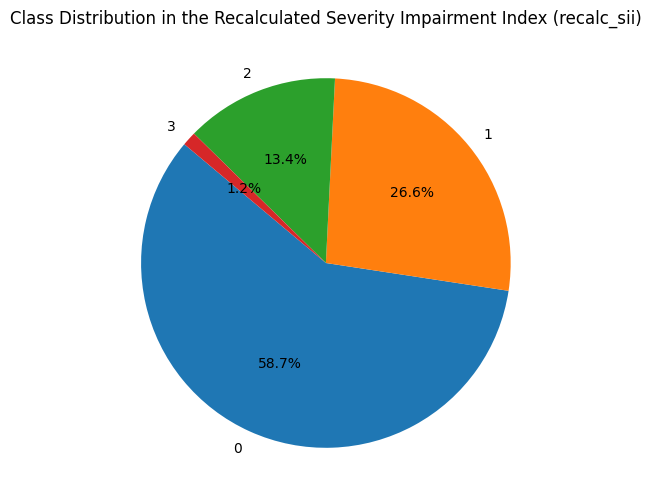

In [13]:
import matplotlib.pyplot as plt

# Step 1: Get the value counts for the recalculated 'recalc_sii' column
value_counts_recalc_sii = train['sii'].value_counts()

# Print value counts (Optional, for verification)
print(value_counts_recalc_sii)

# Step 2: Create the Pie Chart for recalculated SII (recalc_sii)
plt.figure(figsize=(8, 6))
plt.pie(value_counts_recalc_sii, labels=value_counts_recalc_sii.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution in the Recalculated Severity Impairment Index (recalc_sii)')
plt.show()


In [14]:
import pandas as pd

# Define the column mapping
column_mapping = {
    'PCIAT-PCIAT_01': 'disobey_time_limits',
    'PCIAT-PCIAT_02': 'neglect_chores',
    'PCIAT-PCIAT_03': 'prefer_online_over_family',
    'PCIAT-PCIAT_04': 'form_online_relationships',
    'PCIAT-PCIAT_05': 'parent_complains_time',
    'PCIAT-PCIAT_06': 'grades_suffer',
    'PCIAT-PCIAT_07': 'check_email_first',
    'PCIAT-PCIAT_08': 'withdrawn_from_others',
    'PCIAT-PCIAT_09': 'defensive_secretive',
    'PCIAT-PCIAT_10': 'sneaking_online',
    'PCIAT-PCIAT_11': 'alone_in_room_computing',
    'PCIAT-PCIAT_12': 'strange_calls_online_friends',
    'PCIAT-PCIAT_13': 'annoyed_if_bothered',
    'PCIAT-PCIAT_14': 'more_tired_fatigued',
    'PCIAT-PCIAT_15': 'preoccupied_with_online',
    'PCIAT-PCIAT_16': 'tantrums_over_interference',
    'PCIAT-PCIAT_17': 'online_over_hobbies',
    'PCIAT-PCIAT_18': 'angry_at_time_limits',
    'PCIAT-PCIAT_19': 'online_over_friends',
    'PCIAT-PCIAT_20': 'mood_improves_online'
}

# Rename the columns in the DataFrame
train.rename(columns=column_mapping, inplace=True)

# Display the first few rows of the renamed DataFrame
train.head()


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,angry_at_time_limits,online_over_friends,mood_improves_online,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1


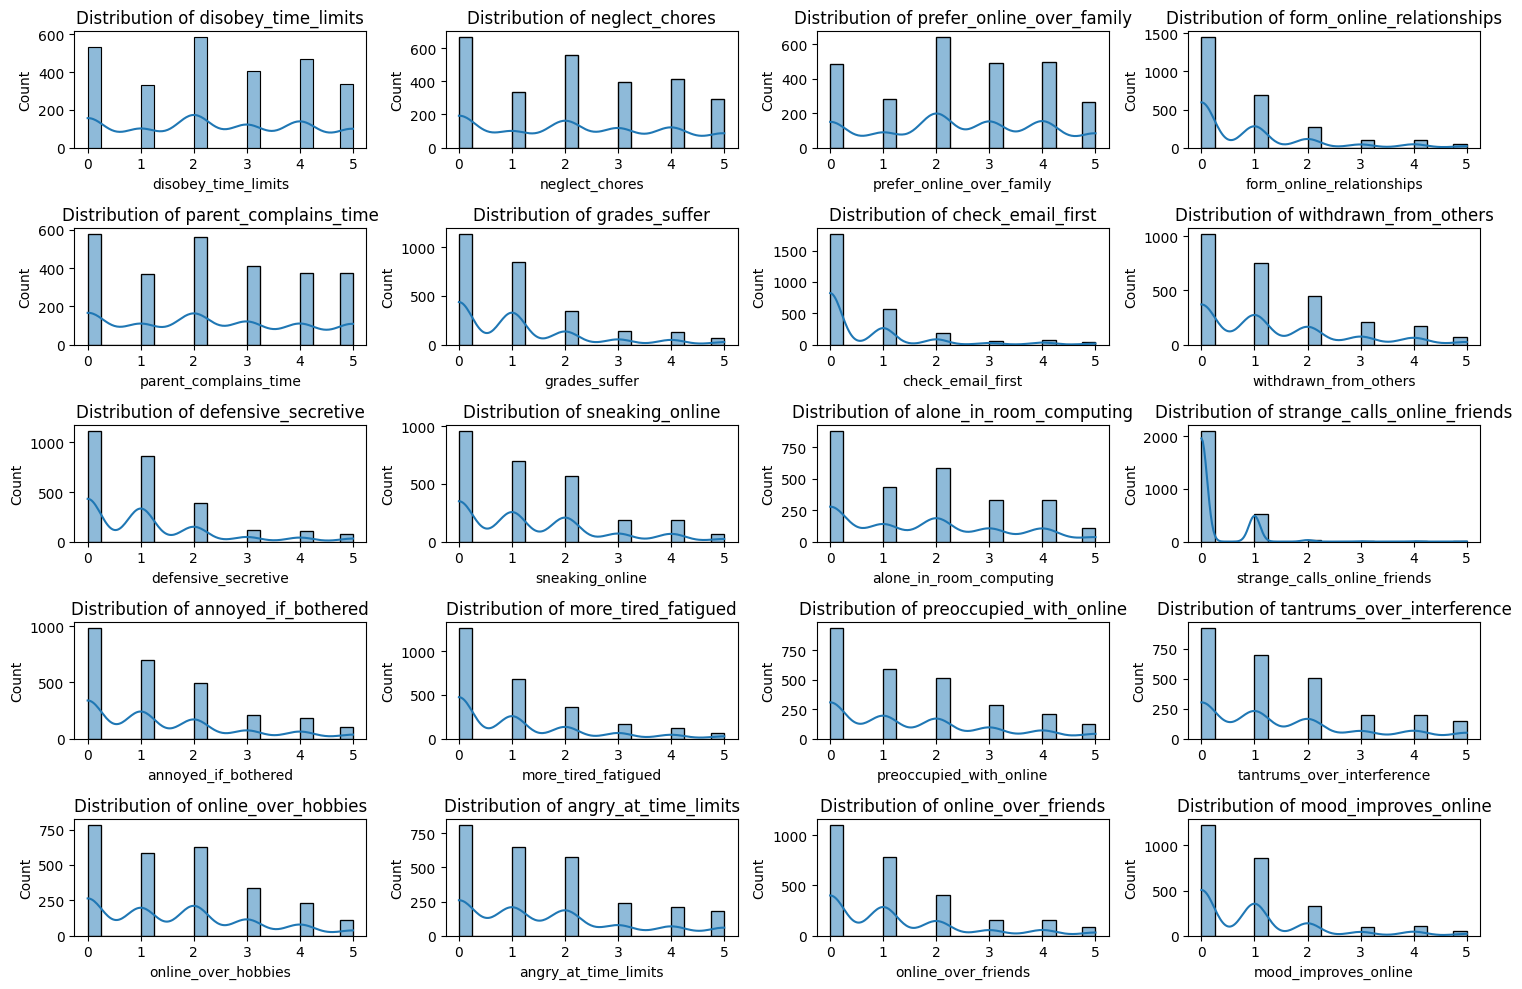

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size for the plot
plt.figure(figsize=(15, 10))

# Plot histograms for each renamed PCIAT column
for i, column in enumerate(column_mapping.values()):
    plt.subplot(5, 4, i+1)
    sns.histplot(train[column].dropna(), bins=20, kde=True)
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.tight_layout()

plt.show()


sii                             1.000000
preoccupied_with_online         0.749626
angry_at_time_limits            0.731540
online_over_hobbies             0.730153
parent_complains_time           0.721238
annoyed_if_bothered             0.706822
mood_improves_online            0.701057
tantrums_over_interference      0.696590
withdrawn_from_others           0.695177
prefer_online_over_family       0.694411
neglect_chores                  0.691779
sneaking_online                 0.689570
online_over_friends             0.681460
more_tired_fatigued             0.674388
defensive_secretive             0.660594
grades_suffer                   0.642509
disobey_time_limits             0.617009
alone_in_room_computing         0.606621
form_online_relationships       0.589662
check_email_first               0.460900
strange_calls_online_friends    0.373088
Name: sii, dtype: float64


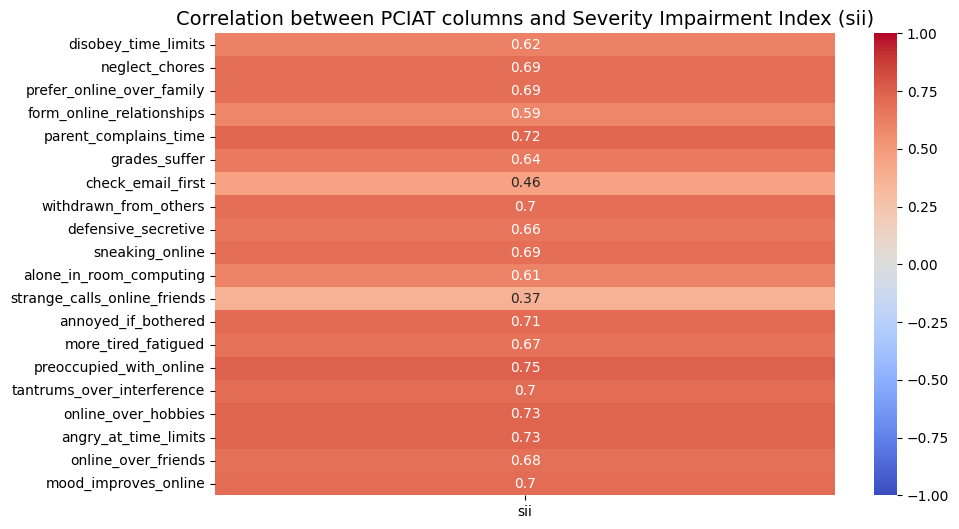

In [16]:
# Convert column_mapping values to a list and concatenate with 'sii'
pciat_columns = list(column_mapping.values())  # Convert dict_values to list

# Compute correlation
correlation = train[pciat_columns + ['sii']].corr()

# Extract the correlations with 'sii'
sii_correlation = correlation['sii'].sort_values(ascending=False)

# Show the correlation values
print(sii_correlation)

# Visualize the correlations with a heatmap
plt.figure(figsize=(10, 6))
# Select the correlation values of 'sii' with each PCIAT column
sns.heatmap(correlation.loc[pciat_columns, ['sii']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between PCIAT columns and Severity Impairment Index (sii)', fontsize=14)
plt.show()

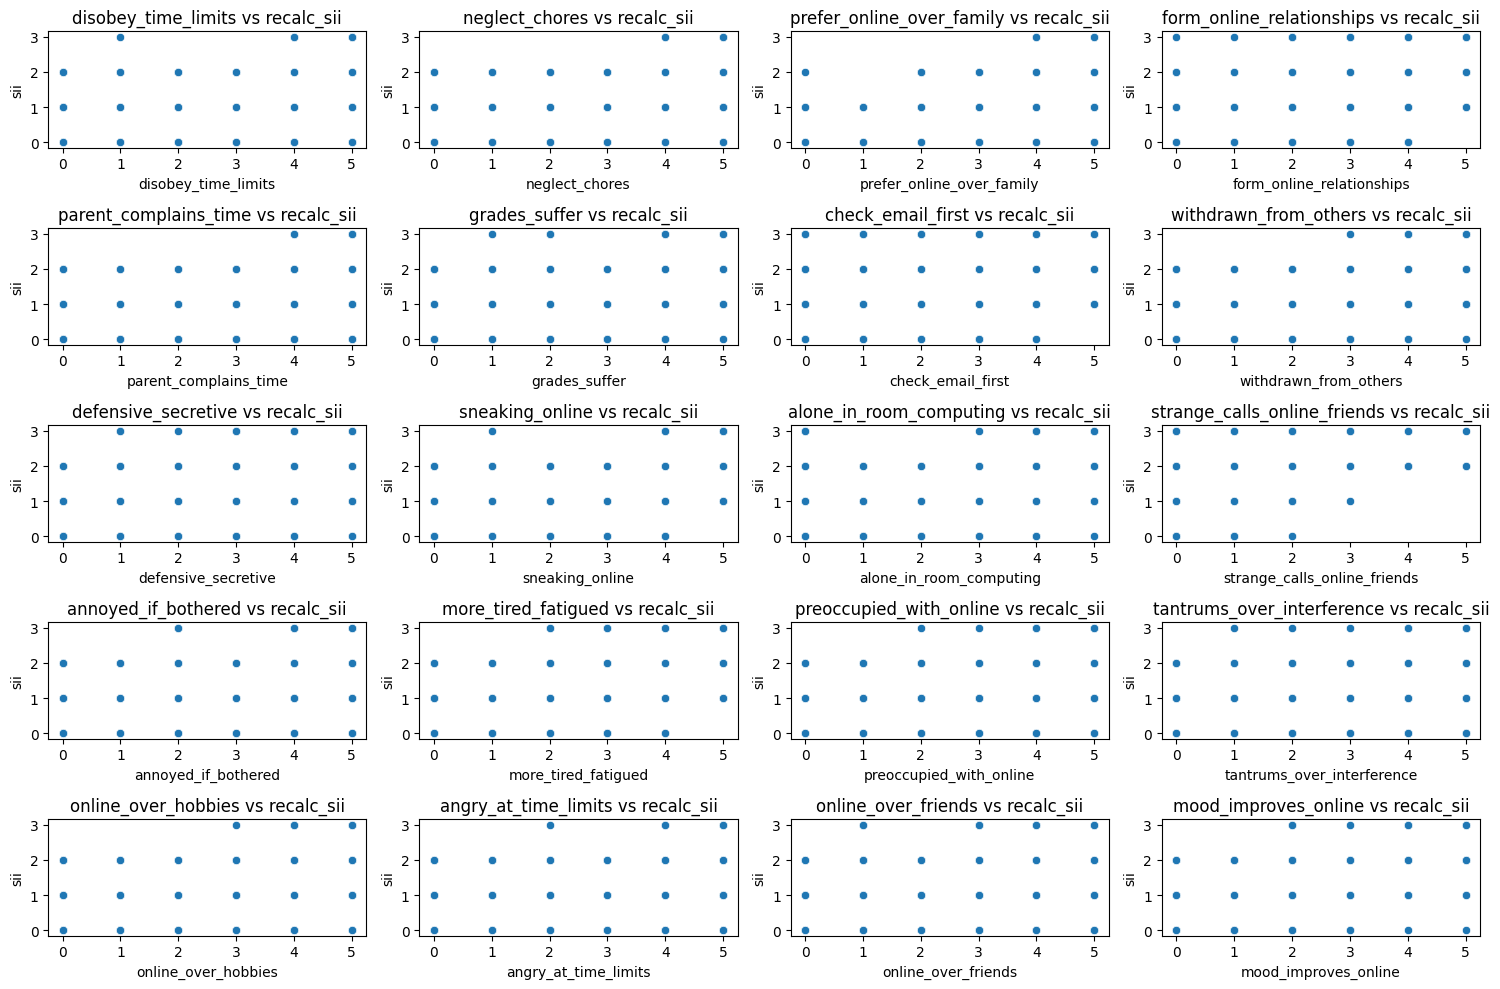

In [17]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Scatter plot for each PCIAT column vs recalc_sii
for i, column in enumerate(pciat_columns):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(x=train[column], y=train['sii'])
    plt.title(f'{column} vs recalc_sii', fontsize=12)
    plt.tight_layout()

plt.show()


Cleaning and understanding demographic fields

In [18]:
print(train['Basic_Demos-Enroll_Season'].unique())
print(train['Basic_Demos-Age'].unique())
print(train['Basic_Demos-Sex'].unique())

['Fall' 'Summer' 'Winter' 'Spring']
[ 5  9 10 13 11  7  6 14 16 12 17  8 15 18 19 21 20 22]
[0 1]


In [19]:
# Check for missing values
print(train[['Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex']].isnull().sum())


Basic_Demos-Enroll_Season    0
Basic_Demos-Age              0
Basic_Demos-Sex              0
dtype: int64


In [20]:
# Summary statistics
print(train['Basic_Demos-Age'].describe())


count    2671.000000
mean       10.205541
std         3.413685
min         5.000000
25%         8.000000
50%        10.000000
75%        12.000000
max        22.000000
Name: Basic_Demos-Age, dtype: float64


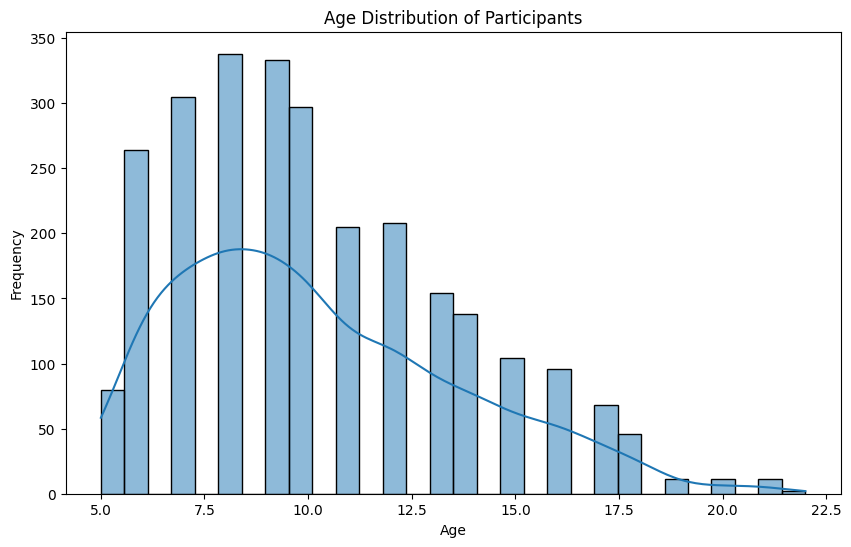

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train['Basic_Demos-Age'], kde=True)
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [22]:
# Correlation between age and 'sii'
age_correlation = train[['Basic_Demos-Age', 'sii']].corr()
print(f"Correlation between Age and sii: {age_correlation.loc['Basic_Demos-Age', 'sii']}")

Correlation between Age and sii: 0.3629922019585949


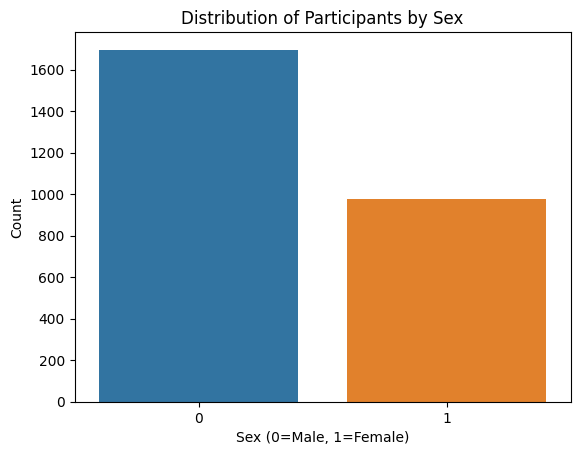

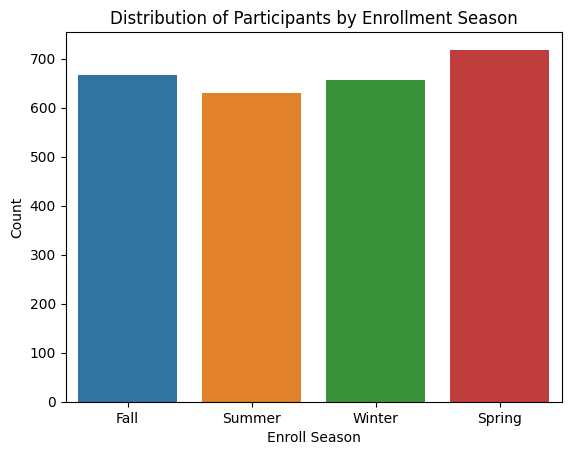

In [23]:
# Count plot for Basic_Demos-Sex
sns.countplot(data=train, x='Basic_Demos-Sex')
plt.title('Distribution of Participants by Sex')
plt.xlabel('Sex (0=Male, 1=Female)')
plt.ylabel('Count')
plt.show()

# Count plot for Basic_Demos-Enroll_Season
sns.countplot(data=train, x='Basic_Demos-Enroll_Season')
plt.title('Distribution of Participants by Enrollment Season')
plt.xlabel('Enroll Season')
plt.ylabel('Count')
plt.show()


In [24]:
from scipy import stats

# Assuming 'train' is your DataFrame and 'Basic_Demos-Sex' is the column for Sex, 'sii' is the target
group1 = train[train['Basic_Demos-Sex'] == 0]['sii']
group2 = train[train['Basic_Demos-Sex'] == 1]['sii']

# Perform t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 5.095656822936743, P-value: 3.7180837553644246e-07


Sex is an important feature to consider for building your model since it has a significant relationship with the target variable sii

In [25]:
# Perform ANOVA for 'Enrollment Season' vs 'sii'
f_stat, p_value = stats.f_oneway(
    train[train['Basic_Demos-Enroll_Season'] == 'Fall']['sii'],
    train[train['Basic_Demos-Enroll_Season'] == 'Spring']['sii'],
    train[train['Basic_Demos-Enroll_Season'] == 'Summer']['sii'],
    train[train['Basic_Demos-Enroll_Season'] == 'Winter']['sii']
)

print(f"F-statistic: {f_stat}, P-value: {p_value}")


F-statistic: 1.3366828672601692, P-value: 0.2606244024186964


Therefore, Enrollment Season does not have a significant impact on sii at the 5% significance level.

In [26]:
# Drop 'Enrollment Season' column from the training dataframe
train = train.drop(columns=['Basic_Demos-Enroll_Season'])



In [27]:
# Calculate Pearson's correlation between 'age' and 'sii'
age_corr = train['Basic_Demos-Age'].corr(train['sii'])
print(f"Pearson correlation between age and sii: {age_corr}")


Pearson correlation between age and sii: 0.3629922019585969


In [28]:
def process_demographics(df):
    # Create age groups
    df['age_group'] = pd.cut(df['Basic_Demos-Age'], 
                            bins=[5, 12, 15, 18, 22],
                            labels=['Child', 'Early Teen', 'Teen', 'Young Adult'])
    
    # Encode categorical variables
    df = pd.get_dummies(df, columns=['age_group'])
    
    return df

process_demographics(train)

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,age_group_Child,age_group_Early Teen,age_group_Teen,age_group_Young Adult
0,00008ff9,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,...,NaN,NaN,NaN,Fall,3.0,2,False,False,False,False
1,000fd460,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,...,Fall,46.0,64.0,Summer,0.0,0,True,False,False,False
2,00105258,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,...,Fall,38.0,54.0,Summer,2.0,0,True,False,False,False
3,00115b9f,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,...,Summer,31.0,45.0,Winter,0.0,1,True,False,False,False
5,001f3379,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,NaN,...,Summer,40.0,56.0,Spring,0.0,1,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,25.0,...,Fall,41.0,58.0,Fall,2.0,0,True,False,False,False
3954,ff759544,7,1,NaN,NaN,Summer,13.927006,48.5,46.6,23.0,...,Summer,48.0,67.0,Summer,0.0,1,True,False,False,False
3955,ff8a2de4,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,NaN,...,Winter,35.0,50.0,Fall,1.0,1,False,True,False,False
3957,ffcd4dbd,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,NaN,...,Winter,56.0,77.0,Fall,0.0,1,True,False,False,False


Internet usage data is crucial to this task because Problematic internet use (PIU), also known as internet addiction or compulsive internet use, refers to excessive and unhealthy use of the internet that interferes with a person’s daily life, responsibilities, and social relationships. The internet usage data provides a direct measure of how much time each participant spends online.

In [29]:
train['PreInt_EduHx-computerinternet_hoursday'].unique()

array([ 3.,  0.,  2.,  1., nan])

In [30]:
# List of columns to display with updated names
columns_to_display = [
    'id', 'Basic_Demos-Age', 'Basic_Demos-Sex',
    'PCIAT-Season', 'disobey_time_limits', 'neglect_chores', 'prefer_online_over_family', 'form_online_relationships',
    'parent_complains_time', 'grades_suffer', 'check_email_first', 'withdrawn_from_others', 'defensive_secretive',
    'sneaking_online', 'alone_in_room_computing', 'strange_calls_online_friends', 'annoyed_if_bothered', 
    'more_tired_fatigued', 'preoccupied_with_online', 'tantrums_over_interference', 'online_over_hobbies',
    'angry_at_time_limits', 'online_over_friends', 'mood_improves_online', 'SDS-Season', 'SDS-SDS_Total_Raw',
    'SDS-SDS_Total_T', 'PreInt_EduHx-Season', 'PreInt_EduHx-computerinternet_hoursday','sii'
]

# Filter the DataFrame to display only the selected columns
train_filtered = train[columns_to_display]

# Show the first few rows of the filtered DataFrame
train_filtered.head()


,id,Basic_Demos-Age,Basic_Demos-Sex,PCIAT-Season,disobey_time_limits,neglect_chores,prefer_online_over_family,form_online_relationships,parent_complains_time,grades_suffer,...,online_over_hobbies,angry_at_time_limits,online_over_friends,mood_improves_online,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,5,0,Fall,5.0,4.0,4.0,0.0,4.0,0.0,...,4.0,4.0,2.0,4.0,NaN,NaN,NaN,Fall,3.0,2
1,000fd460,9,0,Fall,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0
2,00105258,10,1,Fall,5.0,2.0,2.0,1.0,2.0,1.0,...,2.0,2.0,1.0,1.0,Fall,38.0,54.0,Summer,2.0,0
3,00115b9f,9,0,Summer,4.0,2.0,4.0,0.0,5.0,1.0,...,4.0,3.0,4.0,1.0,Summer,31.0,45.0,Winter,0.0,1
5,001f3379,13,1,Summer,3.0,3.0,3.0,0.0,2.0,1.0,...,3.0,1.0,2.0,1.0,Summer,40.0,56.0,Spring,0.0,1


In [31]:
# Display rows where 'PreInt_EduHx-computerinternet_hoursday' is NaN
nan_records = train_filtered[train_filtered['PreInt_EduHx-computerinternet_hoursday'].isna()]
print(nan_records.count())
# Show the first few records with NaN values
nan_records.head()


id                                        81
Basic_Demos-Age                           81
Basic_Demos-Sex                           81
PCIAT-Season                              81
disobey_time_limits                       81
neglect_chores                            81
prefer_online_over_family                 81
form_online_relationships                 81
parent_complains_time                     81
grades_suffer                             81
check_email_first                         81
withdrawn_from_others                     81
defensive_secretive                       81
sneaking_online                           81
alone_in_room_computing                   81
strange_calls_online_friends              81
annoyed_if_bothered                       81
more_tired_fatigued                       81
preoccupied_with_online                   81
tantrums_over_interference                81
online_over_hobbies                       81
angry_at_time_limits                      81
online_ove

,id,Basic_Demos-Age,Basic_Demos-Sex,PCIAT-Season,disobey_time_limits,neglect_chores,prefer_online_over_family,form_online_relationships,parent_complains_time,grades_suffer,...,online_over_hobbies,angry_at_time_limits,online_over_friends,mood_improves_online,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
59,0380e709,17,0,Summer,4.0,2.0,3.0,4.0,4.0,4.0,...,1.0,4.0,2.0,2.0,NaN,NaN,NaN,Summer,NaN,2
96,05777ce1,14,0,Fall,4.0,4.0,4.0,4.0,4.0,3.0,...,4.0,1.0,3.0,2.0,Fall,61.0,84.0,Summer,NaN,2
134,0720320e,15,0,Spring,0.0,0.0,4.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,Spring,30.0,43.0,NaN,NaN,0
157,092c29b9,8,1,Summer,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Summer,37.0,53.0,Summer,NaN,0
166,098d3c32,7,0,Spring,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Spring,54.0,75.0,Winter,NaN,0


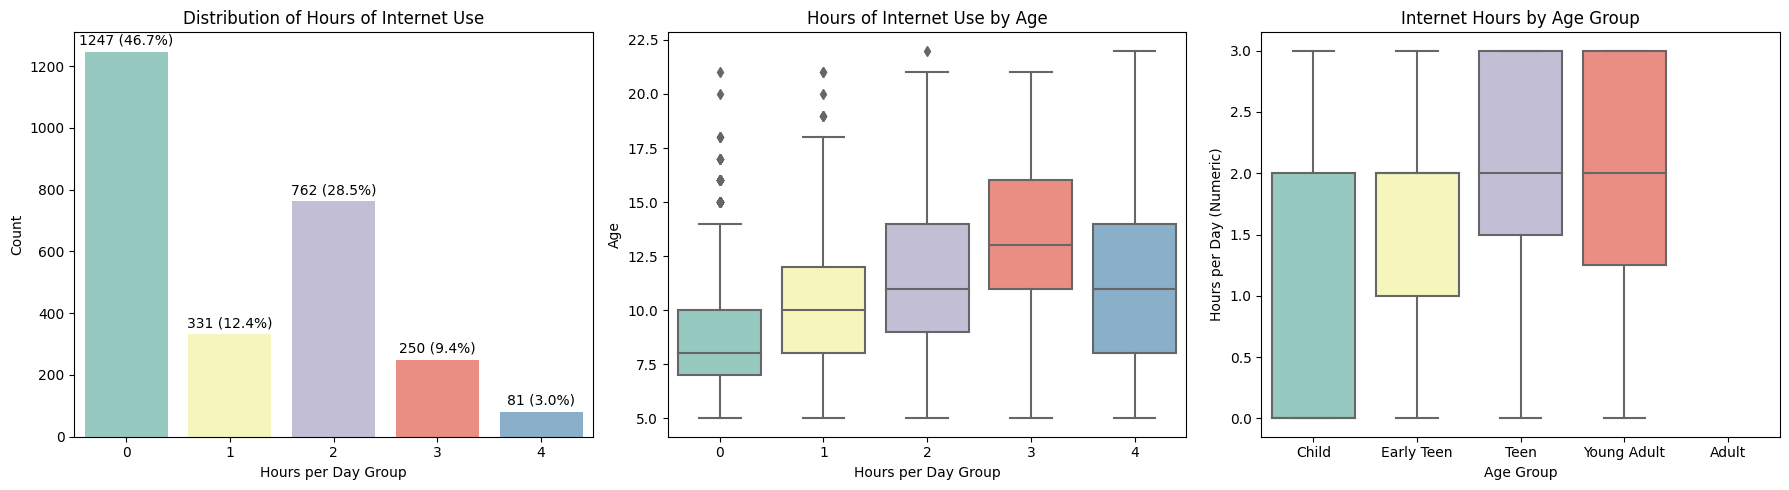

         id  Basic_Demos-Age  Basic_Demos-Sex CGAS-Season  CGAS-CGAS_Score  \
0  00008ff9                5                0      Winter             51.0   
1  000fd460                9                0         NaN              NaN   
2  00105258               10                1        Fall             71.0   
3  00115b9f                9                0        Fall             71.0   
5  001f3379               13                1      Winter             50.0   

  Physical-Season  Physical-BMI  Physical-Height  Physical-Weight  \
0            Fall     16.877316             46.0             50.8   
1            Fall     14.035590             48.0             46.0   
2            Fall     16.648696             56.5             75.6   
3          Summer     18.292347             56.0             81.6   
5          Summer     22.279952             59.5            112.2   

   Physical-Waist_Circumference  ...  PCIAT-PCIAT_Total  SDS-Season  \
0                           NaN  ...         

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 1. Encode the 'PreInt_EduHx-computerinternet_hoursday' feature into numeric values
def encode_internet_usage(df):
    label_encoder = LabelEncoder()
    df['internet_use_encoded'] = label_encoder.fit_transform(df['PreInt_EduHx-computerinternet_hoursday'])
    return df

# 2. Preprocess the dataset and prepare for visualization and model training
def preprocess_and_visualize(df):
    # Step 1: Encode the internet usage feature
    df_encoded = encode_internet_usage(df)
    
    # Step 2: Create additional features if necessary (e.g., Age Group)
    df_encoded['Age Group'] = pd.cut(df_encoded['Basic_Demos-Age'], bins=[5, 12, 15, 18, 22, 65],
                                     labels=['Child', 'Early Teen', 'Teen', 'Young Adult', 'Adult'])

    # Step 3: Visualizations
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Distribution of internet usage hours (encoded)
    ax1 = sns.countplot(x='internet_use_encoded', data=df_encoded, palette="Set3", ax=axes[0])
    axes[0].set_title('Distribution of Hours of Internet Use')
    axes[0].set_xlabel('Hours per Day Group')
    axes[0].set_ylabel('Count')

    total = len(df_encoded['internet_use_encoded'])
    for p in ax1.patches:
        count = int(p.get_height())
        percentage = '{:.1f}%'.format(100 * count / total)
        ax1.annotate(f'{count} ({percentage})', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')

    # Hours of Internet Use by Age
    sns.boxplot(y=df_encoded['Basic_Demos-Age'], x=df_encoded['internet_use_encoded'], ax=axes[1], palette="Set3")
    axes[1].set_title('Hours of Internet Use by Age')
    axes[1].set_ylabel('Age')
    axes[1].set_xlabel('Hours per Day Group')

    # Hours of Internet Use (numeric) by Age Group
    sns.boxplot(y='PreInt_EduHx-computerinternet_hoursday', x='Age Group', data=df_encoded, ax=axes[2], palette="Set3")
    axes[2].set_title('Internet Hours by Age Group')
    axes[2].set_ylabel('Hours per Day (Numeric)')
    axes[2].set_xlabel('Age Group')

    plt.tight_layout()
    plt.show()

    return df_encoded

# Example usage: Apply the full preprocessing and visualization pipeline
train_processed = preprocess_and_visualize(train)

# Check the processed DataFrame for further analysis
print(train_processed.head())


Value counts for 'PreInt_EduHx-computerinternet_hoursday':
PreInt_EduHx-computerinternet_hoursday
0.0    1247
2.0     762
1.0     331
3.0     250
Name: count, dtype: int64


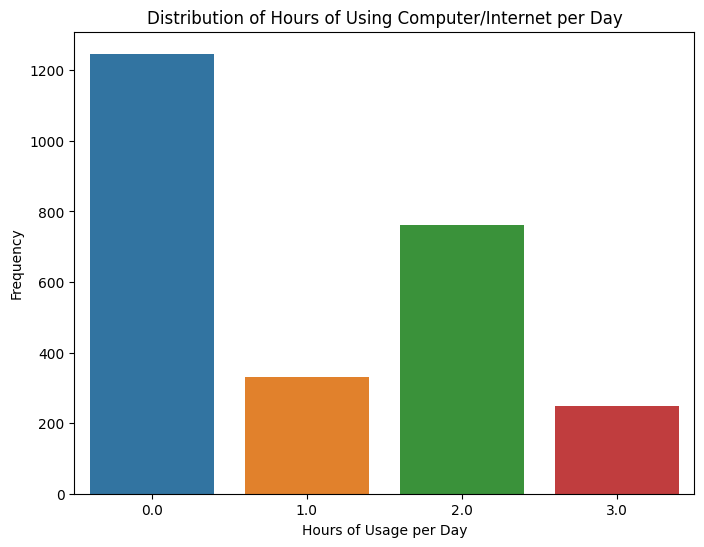


Correlation with 'sii':
                                        PreInt_EduHx-computerinternet_hoursday  \
PreInt_EduHx-computerinternet_hoursday                                1.000000   
sii                                                                   0.332946   

                                             sii  
PreInt_EduHx-computerinternet_hoursday  0.332946  
sii                                     1.000000  

Missing values in the dataset:
81


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats

# 1. Exploratory Data Analysis (EDA) for 'PreInt_EduHx-computerinternet_hoursday'
def eda_computer_internet_usage(df):
    # Check the distribution of the 'PreInt_EduHx-computerinternet_hoursday'
    print("Value counts for 'PreInt_EduHx-computerinternet_hoursday':")
    print(df['PreInt_EduHx-computerinternet_hoursday'].value_counts())
    
    # Visualizing the distribution of the feature
    plt.figure(figsize=(8, 6))
    sns.countplot(x='PreInt_EduHx-computerinternet_hoursday', data=df)
    plt.title('Distribution of Hours of Using Computer/Internet per Day')
    plt.xlabel('Hours of Usage per Day')
    plt.ylabel('Frequency')
    plt.show()
    
    # Check the correlation of this feature with the target variable 'sii'
    print("\nCorrelation with 'sii':")
    correlation = df[['PreInt_EduHx-computerinternet_hoursday', 'sii']].corr()
    print(correlation)

    # Checking for missing values
    print("\nMissing values in the dataset:")
    print(df['PreInt_EduHx-computerinternet_hoursday'].isnull().sum())

# 2. Data Cleaning for 'PreInt_EduHx-computerinternet_hoursday'
def clean_computer_internet_usage(df):
    # Handle missing values by filling with the mode (since it's categorical data)
    df['PreInt_EduHx-computerinternet_hoursday'].fillna(df['PreInt_EduHx-computerinternet_hoursday'].mode()[0], inplace=True)
    
    # Ensure the values are within the expected range (0, 1, 2, 3)
    valid_values = [0, 1, 2, 3]
    df = df[df['PreInt_EduHx-computerinternet_hoursday'].isin(valid_values)]
    
    return df

# 3. Data Preprocessing for 'PreInt_EduHx-computerinternet_hoursday'
def preprocess_computer_internet_usage(df):
    # Convert the categorical feature 'PreInt_EduHx-computerinternet_hoursday' into numerical values if needed
    # Option 1: Label encoding (0=Less than 1h/day, 1=Around 1h/day, 2=Around 2hs/day, 3=More than 3hs/day)
    label_encoder = LabelEncoder()
    df['PreInt_EduHx-computerinternet_hoursday_encoded'] = label_encoder.fit_transform(df['PreInt_EduHx-computerinternet_hoursday'])
    
    # Option 2: One-hot encoding, if needed
    # df = pd.get_dummies(df, columns=['PreInt_EduHx-computerinternet_hoursday'], drop_first=True)
    
    return df

# 4. Putting it all together: Full EDA, Cleaning, and Preprocessing
def full_process(df):
    # Perform EDA
    eda_computer_internet_usage(df)
    return df
    # # Clean the feature (handle missing values and remove outliers)
    # df_cleaned = clean_computer_internet_usage(df)
    
    # # Preprocess the feature (encode the categorical feature)
    # df_processed = preprocess_computer_internet_usage(df_cleaned)
    
    # # Check the cleaned and processed data
    # print("\nProcessed DataFrame:")
    # print(df_processed.head())

    # return df_processed

# Example: Apply the full processing pipeline to the data
train_processed = full_process(train)



In [34]:
# Data preprocessing function
def preprocess_features(df):
    # 1. Handle missing values for continuous columns
    # Fill missing values in 'SDS-SDS_Total_Raw' and 'SDS-SDS_Total_T' with the median
    df['SDS-SDS_Total_Raw'].fillna(df['SDS-SDS_Total_Raw'].median(), inplace=True)
    df['SDS-SDS_Total_T'].fillna(df['SDS-SDS_Total_T'].median(), inplace=True)
    
    # 2. One-hot encode categorical columns
    df = pd.get_dummies(df, columns=['SDS-Season', 'PreInt_EduHx-Season', 'PreInt_EduHx-computerinternet_hoursday'], drop_first=True)

    # 3. Creating new features for internet/computer usage hours for weekdays and weekends
    # Assuming the data has columns indicating weekday and weekend usage (if not, you can create these manually)
    # For simplicity, assume 'PreInt_EduHx-computerinternet_hoursday' represents average usage for a day,
    # but let's split them into weekday and weekend columns.
    
    # Example assumptions: We'll assume uniform usage across weekdays and weekends for this example.
    # In a real case, you'd need to calculate this based on actual data (e.g., weekday-specific usage).
    df['computer_hours_weekday'] = df['PreInt_EduHx-computerinternet_hoursday'].apply(lambda x: x if x in [0, 1, 2, 3] else 0)
    df['computer_hours_weekend'] = df['PreInt_EduHx-computerinternet_hoursday'].apply(lambda x: x if x in [0, 1, 2, 3] else 0)
    df['internet_hours_weekday'] = df['PreInt_EduHx-computerinternet_hoursday'].apply(lambda x: x if x in [0, 1, 2, 3] else 0)
    df['internet_hours_weekend'] = df['PreInt_EduHx-computerinternet_hoursday'].apply(lambda x: x if x in [0, 1, 2, 3] else 0)

    # 4. Scaling continuous features 'SDS-SDS_Total_Raw' and 'SDS-SDS_Total_T' for SVM model
    scaler = StandardScaler()
    df[['SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']] = scaler.fit_transform(df[['SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']])

    return df

# Example: Apply data exploration and preprocessing
# check_data_distribution(train)

# # After data exploration, now preprocess the data
# train_processed = preprocess_features(train)

# # Check the processed dataframe
# print(train_processed.head())
